## Install the Whisper Code

In [1]:
from huggingface_hub import interpreter_login

interpreter_login()


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token can be pasted using 'Right-Click'.
Token: ········
Add token as git credential? (Y/n) y
Token is valid.
Your

In [2]:
whisper_model = "openai/whisper-small"
language = "ko"
dataset_name = "whisper-data"	# huggingface hub에 저장할 데이터세트 이름
model_name = "whisper_fine_tuning_lr_30000"	# huggingface hub에 저장할 모델 이름
huggingface_name = "yd97"	# huggingface hub의 닉네임

In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv("E:/Emocog/emocog_alzheimer_lingustic/linguistic_data.csv")
train_df=train_df.drop(['wav_length'],axis=1)
train_df

path  \
0      ./audio_segmentation/wav/Arete-0001_52_55.wav   
1      ./audio_segmentation/wav/Arete-0001_55_57.wav   
2      ./audio_segmentation/wav/Arete-0001_58_64.wav   
3      ./audio_segmentation/wav/Arete-0001_65_67.wav   
4      ./audio_segmentation/wav/Arete-0001_71_75.wav   
...                                              ...   
20740  ./audio_segmentation/wav/M_YGT_73_389_392.wav   
20741  ./audio_segmentation/wav/M_YGT_73_397_402.wav   
20742  ./audio_segmentation/wav/M_YGT_73_406_409.wav   
20743  ./audio_segmentation/wav/M_YGT_73_416_420.wav   
20744  ./audio_segmentation/wav/M_YGT_73_424_427.wav   

                                              sentence  
0                                                   식사  
1                                      어떤 때는 계란 두 개 먹고  
2      저기 토마토하고 우유하고 뭐 아로니에 하고 이런 거 갈아서 마시고 밥 지을 때도 있고  
3                                 아니면 밥 조금 더 곁들일 때도 있고  
4                                     아니 아저씨랑 먹을 때도 있고  
...                                                ...  
20740                                  마을에서 쫓아내려고 했습니다  
20741                                 착한 콩쥐는 팥쥐와 팥쥐엄마를  
20742                                집에 데리고 와 함께 살았습니다  
20743                            사또는 콩쥐가 착한 했다는 소문을 듣고  
20744                                  콩쥐를 신부로 맞이하였습니다  

[20745 rows x 2 columns]

In [5]:
train_df.columns=['audio','transcription']
train_df

audio  \
0      ./audio_segmentation/wav/Arete-0001_52_55.wav   
1      ./audio_segmentation/wav/Arete-0001_55_57.wav   
2      ./audio_segmentation/wav/Arete-0001_58_64.wav   
3      ./audio_segmentation/wav/Arete-0001_65_67.wav   
4      ./audio_segmentation/wav/Arete-0001_71_75.wav   
...                                              ...   
20740  ./audio_segmentation/wav/M_YGT_73_389_392.wav   
20741  ./audio_segmentation/wav/M_YGT_73_397_402.wav   
20742  ./audio_segmentation/wav/M_YGT_73_406_409.wav   
20743  ./audio_segmentation/wav/M_YGT_73_416_420.wav   
20744  ./audio_segmentation/wav/M_YGT_73_424_427.wav   

                                         transcription  
0                                                   식사  
1                                      어떤 때는 계란 두 개 먹고  
2      저기 토마토하고 우유하고 뭐 아로니에 하고 이런 거 갈아서 마시고 밥 지을 때도 있고  
3                                 아니면 밥 조금 더 곁들일 때도 있고  
4                                     아니 아저씨랑 먹을 때도 있고  
...                                                ...  
20740                                  마을에서 쫓아내려고 했습니다  
20741                                 착한 콩쥐는 팥쥐와 팥쥐엄마를  
20742                                집에 데리고 와 함께 살았습니다  
20743                            사또는 콩쥐가 착한 했다는 소문을 듣고  
20744                                  콩쥐를 신부로 맞이하였습니다  

[20745 rows x 2 columns]

In [6]:
train_df['audio']=train_df['audio'].apply(lambda x:'E:/Emocog/emocog_alzheimer_lingustic/audio_segmentation'+x[1:])
train_df

audio  \
0      E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
1      E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
2      E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
3      E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
4      E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
...                                                  ...   
20740  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
20741  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
20742  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
20743  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
20744  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   

                                         transcription  
0                                                   식사  
1                                      어떤 때는 계란 두 개 먹고  
2      저기 토마토하고 우유하고 뭐 아로니에 하고 이런 거 갈아서 마시고 밥 지을 때도 있고  
3                                 아니면 밥 조금 더 곁들일 때도 있고  
4                                     아니 아저씨랑 먹을 때도 있고  
...                                                ...  
20740                                  마을에서 쫓아내려고 했습니다  
20741                                 착한 콩쥐는 팥쥐와 팥쥐엄마를  
20742                                집에 데리고 와 함께 살았습니다  
20743                            사또는 콩쥐가 착한 했다는 소문을 듣고  
20744                                  콩쥐를 신부로 맞이하였습니다  

[20745 rows x 2 columns]

In [7]:
train_df['transcription']

0                                                     식사
1                                        어떤 때는 계란 두 개 먹고
2        저기 토마토하고 우유하고 뭐 아로니에 하고 이런 거 갈아서 마시고 밥 지을 때도 있고
3                                   아니면 밥 조금 더 곁들일 때도 있고
4                                       아니 아저씨랑 먹을 때도 있고
                              ...                       
20740                                    마을에서 쫓아내려고 했습니다
20741                                   착한 콩쥐는 팥쥐와 팥쥐엄마를
20742                                  집에 데리고 와 함께 살았습니다
20743                              사또는 콩쥐가 착한 했다는 소문을 듣고
20744                                    콩쥐를 신부로 맞이하였습니다
Name: transcription, Length: 20745, dtype: object

In [8]:
train_df['transcription']=train_df['transcription'].astype(str)
train_df['transcription']

0                                                     식사
1                                        어떤 때는 계란 두 개 먹고
2        저기 토마토하고 우유하고 뭐 아로니에 하고 이런 거 갈아서 마시고 밥 지을 때도 있고
3                                   아니면 밥 조금 더 곁들일 때도 있고
4                                       아니 아저씨랑 먹을 때도 있고
                              ...                       
20740                                    마을에서 쫓아내려고 했습니다
20741                                   착한 콩쥐는 팥쥐와 팥쥐엄마를
20742                                  집에 데리고 와 함께 살았습니다
20743                              사또는 콩쥐가 착한 했다는 소문을 듣고
20744                                    콩쥐를 신부로 맞이하였습니다
Name: transcription, Length: 20745, dtype: object

In [9]:
import re
def clean_text(text):
    cleaned_text=re.sub(r"[^\uAC00-\uD7A30-9\s]", "", text)
    return cleaned_text

for i in range(len(train_df)):
    train_df['transcription'][i] = clean_text(train_df['transcription'][i])
train_df


audio  \
0      E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
1      E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
2      E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
3      E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
4      E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
...                                                  ...   
20740  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
20741  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
20742  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
20743  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
20744  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   

                                         transcription  
0                                                   식사  
1                                      어떤 때는 계란 두 개 먹고  
2      저기 토마토하고 우유하고 뭐 아로니에 하고 이런 거 갈아서 마시고 밥 지을 때도 있고  
3                                 아니면 밥 조금 더 곁들일 때도 있고  
4                                     아니 아저씨랑 먹을 때도 있고  
...                                                ...  
20740                                  마을에서 쫓아내려고 했습니다  
20741                                 착한 콩쥐는 팥쥐와 팥쥐엄마를  
20742                                집에 데리고 와 함께 살았습니다  
20743                            사또는 콩쥐가 착한 했다는 소문을 듣고  
20744                                  콩쥐를 신부로 맞이하였습니다  

[20745 rows x 2 columns]

In [10]:
a=[]
for i in range(len(train_df)):
    if len(train_df['transcription'][i])==0:
        a.append(i)
print(a)
print(len(a))

[90, 434, 443, 651, 861, 923, 924, 1062, 1218, 1635, 2357, 2781, 4113, 4593, 4761, 5313, 6842, 6854, 6855, 6856, 6860, 6893, 7019, 7023, 7048, 7162, 7330, 7339, 7477, 7738, 7822, 7845, 8153, 11074, 12616, 12825, 12833, 12855, 12856, 12883, 12948, 13030, 13427, 13428, 13490, 13686, 14360, 14363, 16240, 17117, 18093, 18228, 18864, 18879, 19356, 20036, 20081, 20574, 20595, 20596]
60


In [11]:
train_df=train_df.drop(a,axis=0)
train_df=train_df.reset_index(drop=True)
train_df

audio  \
0      E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
1      E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
2      E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
3      E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
4      E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
...                                                  ...   
20680  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
20681  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
20682  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
20683  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
20684  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   

                                         transcription  
0                                                   식사  
1                                      어떤 때는 계란 두 개 먹고  
2      저기 토마토하고 우유하고 뭐 아로니에 하고 이런 거 갈아서 마시고 밥 지을 때도 있고  
3                                 아니면 밥 조금 더 곁들일 때도 있고  
4                                     아니 아저씨랑 먹을 때도 있고  
...                                                ...  
20680                                  마을에서 쫓아내려고 했습니다  
20681                                 착한 콩쥐는 팥쥐와 팥쥐엄마를  
20682                                집에 데리고 와 함께 살았습니다  
20683                            사또는 콩쥐가 착한 했다는 소문을 듣고  
20684                                  콩쥐를 신부로 맞이하였습니다  

[20685 rows x 2 columns]

In [12]:
a=train_df

In [13]:
train_df=a[:16548]
test_df=a[:-16548]
test_df

audio  \
0     E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
1     E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
2     E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
3     E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
4     E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
...                                                 ...   
4132  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
4133  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
4134  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
4135  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   
4136  E:/Emocog/emocog_alzheimer_lingustic/audio_seg...   

                                          transcription  
0                                                    식사  
1                                       어떤 때는 계란 두 개 먹고  
2       저기 토마토하고 우유하고 뭐 아로니에 하고 이런 거 갈아서 마시고 밥 지을 때도 있고  
3                                  아니면 밥 조금 더 곁들일 때도 있고  
4                                      아니 아저씨랑 먹을 때도 있고  
...                                                 ...  
4132  저 저기 그리고 밥 먹고 나서 꼭 저기 커피 한 잔에다가 그거 먹고 위에다가 저기 ...  
4133  텔레비전 저 딱 하 하루에 오전에 두 시간 오후에는 이제 저 이제 지금 이제 텔레비...  
4134                            저 이제 뉴스 하고요 저기 노래 나오는 거  
4135  아 기분은 뭐 이렇게  매 이렇게 날씨 좋으면 좋고 날 날씨가 우중충하면 내 마음도...  
4136                                         오늘 날씨 좋잖아요  

[4137 rows x 2 columns]

In [14]:
train_df=train_df.reset_index(drop=True)
test_df=test_df.reset_index(drop=True)

In [15]:
from datasets import DatasetDict, Dataset, Audio
import pandas as pd
import json


train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

dataset = DatasetDict()

dataset["train"] = train_dataset
dataset["test"] = test_dataset

In [16]:
dataset

DatasetDict({
    train: Dataset({
        features: ['audio', 'transcription'],
        num_rows: 16548
    })
    test: Dataset({
        features: ['audio', 'transcription'],
        num_rows: 4137
    })
})

In [17]:
from transformers import WhisperTokenizer
tokenizer = WhisperTokenizer.from_pretrained(whisper_model , language='ko' , task="transcribe")


input_str = dataset["train"][0]["transcription"]
labels = tokenizer(input_str).input_ids
decoded_with_special = tokenizer.decode(labels, skip_special_tokens=False)
decoded_str = tokenizer.decode(labels, skip_special_tokens=True)

print('labels',labels)
print(f"Input :                 {input_str}")
print(f"Decode w/ special :     {decoded_with_special}")
print(f"Decoded w/out special : {decoded_str}")
print(f"Are equal :             {input_str == decoded_str}")

labels [50258, 50264, 50359, 50363, 10436, 5727, 50257]
Input :                 식사
Decode w/ special :     <|startoftranscript|><|ko|><|transcribe|><|notimestamps|>식사<|endoftext|>
Decoded w/out special : 식사
Are equal :             True


In [18]:
from datasets import Audio

dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))

In [19]:
import torch
torch.cuda.is_available()

True

In [20]:

from transformers import WhisperFeatureExtractor, WhisperTokenizer

feature_extractor = WhisperFeatureExtractor.from_pretrained(whisper_model)
tokenizer = WhisperTokenizer.from_pretrained(whisper_model, language=language, task="transcribe")

def prepare_dataset(batch):
    audio = batch["audio"]
    batch["input_features"] = feature_extractor(audio["array"], sampling_rate = audio["sampling_rate"]).input_features[0]
   
    batch["labels"] = tokenizer(batch["transcription"]).input_ids
    return batch


dataset = dataset.map(prepare_dataset, remove_columns=dataset.column_names["train"])
dataset

Map:   0%|          | 0/16548 [00:00<?, ? examples/s]

Map:   0%|          | 0/4137 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_features', 'labels'],
        num_rows: 16548
    })
    test: Dataset({
        features: ['input_features', 'labels'],
        num_rows: 4137
    })
})

In [21]:
import torch

from dataclasses import dataclass
from typing import Any, Dict, List, Union


@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any


    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lengths and need different padding methods
        # first treat the audio inputs by simply returning torch tensors
        input_features = [{"input_features": feature["input_features"]} for feature in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")


        # get the tokenized label sequences
        label_features = [{"input_ids": feature["labels"]} for feature in features]
        # pad the labels to max length
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")


        # replace padding with -100 to ignore loss correctly
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)


        # if bos token is appended in previous tokenization step,
        # cut bos token here as it's append later anyways
        if (labels[:, 0] == self.processor.tokenizer.bos_token_id).all().cpu().item():
            labels = labels[:, 1:]


        batch["labels"] = labels


        return batch

In [22]:
from transformers import WhisperProcessor

processor = WhisperProcessor.from_pretrained(whisper_model, language=language, task="transcribe")

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)
data_collator

DataCollatorSpeechSeq2SeqWithPadding(processor=WhisperProcessor:
- feature_extractor: WhisperFeatureExtractor {
  "chunk_length": 30,
  "feature_extractor_type": "WhisperFeatureExtractor",
  "feature_size": 80,
  "hop_length": 160,
  "n_fft": 400,
  "n_samples": 480000,
  "nb_max_frames": 3000,
  "padding_side": "right",
  "padding_value": 0.0,
  "processor_class": "WhisperProcessor",
  "return_attention_mask": false,
  "sampling_rate": 16000
}

- tokenizer: WhisperTokenizer(name_or_path='openai/whisper-small', vocab_size=50258, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad_token': '<|endoftext|>', 'additional_spec

In [23]:
import evaluate

metric = evaluate.load("wer")

def compute_metrics(pred):
    pred_ids = pred.predictions
    label_ids = pred.label_ids

    # replace -100 with the pad_token_id
    label_ids[label_ids == -100] = tokenizer.pad_token_id

    # we do not want to group tokens when computing the metrics
    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    label_str = tokenizer.batch_decode(label_ids, skip_special_tokens=True)

    wer = 100 * metric.compute(predictions=pred_str, references=label_str)
    return {"wer": wer}

In [24]:
from transformers import WhisperForConditionalGeneration

model = WhisperForConditionalGeneration.from_pretrained(whisper_model)

model.config.forced_decoder_ids = None
model.config.suppress_tokens = []

In [25]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir=model_name,  # change to a repo name of your choice
    per_device_train_batch_size=8,
    gradient_accumulation_steps=1,  # increase by 2x for every 2x decrease in batch size
    learning_rate=1e-6,
    warmup_steps=500,
    max_steps=30000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=8,
    predict_with_generate=True,
    generation_max_length=225,
    save_steps=500,
    eval_steps=500,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    metric_for_best_model="wer",
    greater_is_better=False,
    push_to_hub=True,
)

In [26]:
import gc
import torch
gc.collect()
torch.cuda.empty_cache()

In [27]:
!git

usage: git [-v | --version] [-h | --help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           [--super-prefix=<path>] [--config-env=<name>=<envvar>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone     Clone a repository into a new directory
   init      Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add       Add file contents to the index
   mv        Move or rename a file, a directory, or a symlink
   restore   Restore working tree files
   rm        Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect    Use binary search 

In [28]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=processor.feature_extractor,
)

trainer.train()

Cloning https://huggingface.co/yd97/whisper_fine_tuning_lr_30000 into local empty directory.
C:\Users\prlab\Anaconda3\envs\emocog\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
`use_cache = True` is incompatible with gradient checkpointing. Setting `use_cache = False`...


Several commits (2) will be pushed upstream.
Several commits (3) will be pushed upstream.
Several commits (4) will be pushed upstream.
Several commits (5) will be pushed upstream.
Several commits (6) will be pushed upstream.
Several commits (7) will be pushed upstream.
Several commits (8) will be pushed upstream.
Several commits (2) will be pushed upstream.
Several commits (3) will be pushed upstream.
Several commits (2) will be pushed upstream.
Several commits (3) will be pushed upstream.
Several commits (2) will be pushed upstream.
Several commits (3) will be pushed upstream.
Several commits (4) will be pushed upstream.
Several commits (2) will be pushed upstream.
Several commits (3) will be pushed upstream.
Several commits (4) will be pushed upstream.
Several commits (5) will be pushed upstream.
Several commits (2) will be pushed upstream.
Several commits (3) will be pushed upstream.
Several commits (4) will be pushed upstream.
Several commits (5) will be pushed upstream.
Several co

TrainOutput(global_step=30000, training_loss=0.234419206905365, metrics={'train_runtime': 135549.5903, 'train_samples_per_second': 1.771, 'train_steps_per_second': 0.221, 'total_flos': 6.924433529438208e+19, 'train_loss': 0.234419206905365, 'epoch': 14.5})

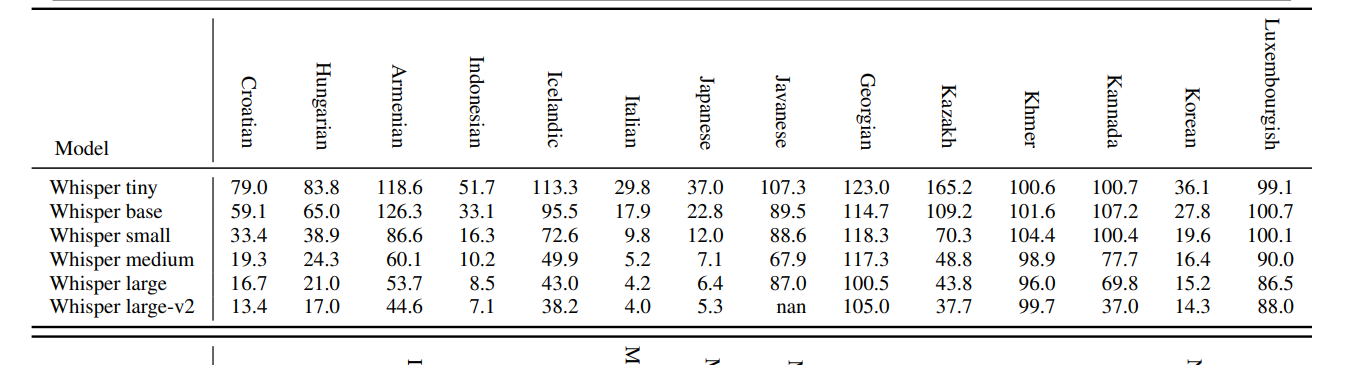

tensorboard --logdir=C:\Users\prlab\Desktop\emocog\whisper_fine_tuning_lr\runs\Apr11_13-42-45_DESKTOP-62UK6VP

In [29]:
model

WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(80, 768, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(768, 768, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 768)
      (layers): ModuleList(
        (0): WhisperEncoderLayer(
          (self_attn): WhisperAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=False)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (final_lay

In [30]:
import json
with open("E:/Emocog/자유대화 음성(노인남여)/자유대화 음성(노인남녀)/Validation/[라벨]4.AI스피커/노인남여_노인대화77_F_김XX_62_제주_실내/노인남여_노인대화77_F_김XX_62_제주_실내_84050.json", 'r',encoding='utf-8') as f:
        data = json.load(f)
  
        # JSON 파일 내용 처리
        # 예를 들어, data를 출력해보기
data['발화정보']['stt']

'그래도 (FP:뭐) 우리 어머니는'

In [31]:
from transformers import WhisperForConditionalGeneration, WhisperProcessor

model = WhisperForConditionalGeneration.from_pretrained("yd97/whisper_fine_tuning_lr_30000")


C:\Users\prlab\Anaconda3\envs\emocog\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\prlab\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [32]:
from transformers import pipeline




pipe = pipeline("automatic-speech-recognition",model="yd97/whisper_fine_tuning_lr_30000",tokenizer=tokenizer)
print(pipe)
def transcribe(audio):
    text = pipe(audio)["text"]
    return text

audio = "E:/Emocog/자유대화 음성(노인남여)/자유대화 음성(노인남녀)/Validation/[원천]4.AI스피커/노인남여_노인대화77_F_김XX_62_제주_실내/노인남여_노인대화77_F_김XX_62_제주_실내_84050.wav"
transcribe(audio)

ValueError: ffmpeg was not found but is required to load audio files from filename